<a href="https://colab.research.google.com/github/Kishankumar1328/Machine-learning/blob/main/mlais_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report


In [ ]:
df=pd.read_csv("/content/SPAM DATASET.csv")

In [ ]:
df.head(13)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [ ]:
df.rename(columns={
    "Unnamed: 0": "ID",
    "label": "spam/notspam",
    "text": "message",
    "label_num": "spam"
}, inplace=True)


In [ ]:
df.head()

,ID,spam/notspam,message,spam
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.drop("spam/notspam",axis=1,inplace=True)

In [ ]:
df.drop("ID",axis=1,inplace=True)
df

,message,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [ ]:
vectorizer=TfidfVectorizer(stop_words="english",max_features=3000)
x=vectorizer.fit_transform(df["message"])
y=df["spam"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
svm=SVC(kernel="rbf",gamma="scale",class_weight="balanced")
svm.fit(x_train,y_train)

SVC(class_weight='balanced')

In [ ]:
y_pred=svm.predict(x_test)

In [ ]:
svm.score(x_test,y_test)

0.9903381642512077

In [ ]:
classification_report_svm = classification_report(y_test, y_pred)
print(classification_report_svm)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       742
           1       0.97      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



In [ ]:
spam_text=df[df["spam"]==1]["message"]
notspam_text=df[df["spam"]==0]["message"]

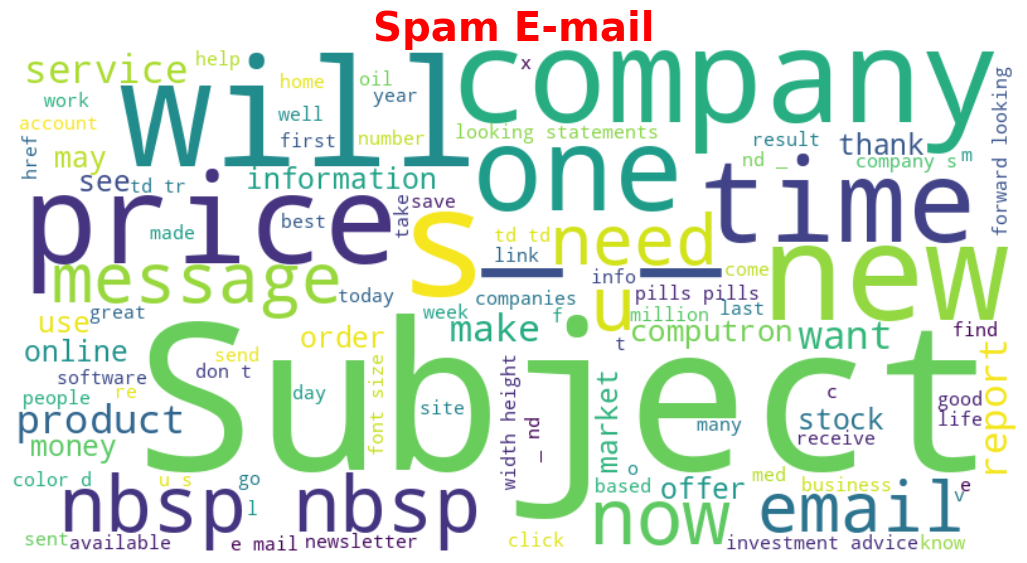

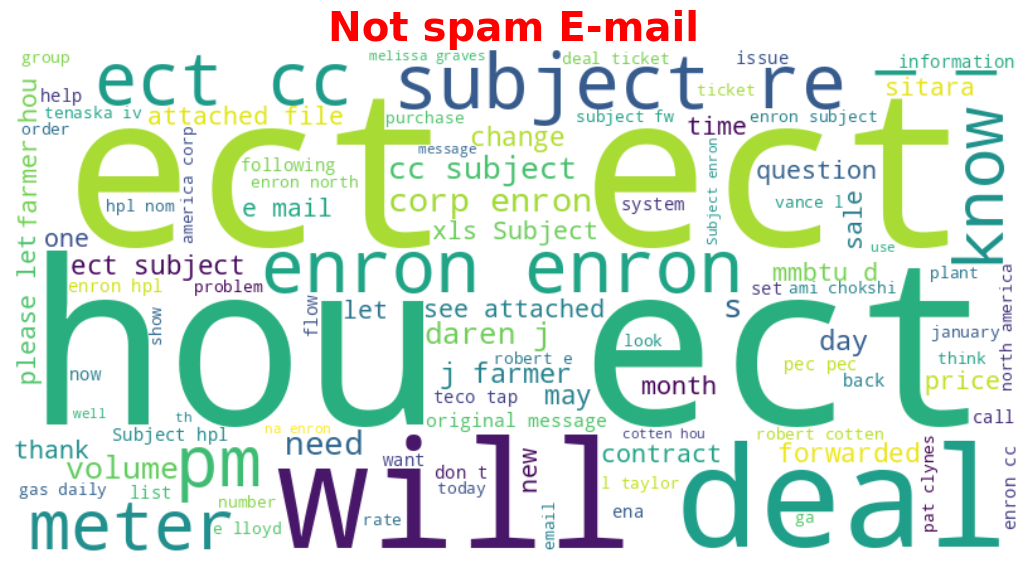

In [ ]:
from wordcloud import WordCloud

def wc(text_data,title):
  wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(' '.join(text_data))
  plt.figure(figsize=(13,29))
  plt.imshow(wordcloud,interpolation="bilinear")
  plt.title(title,fontsize=29,fontweight="bold",color="red")
  plt.axis("off")
  plt.show()

wc(spam_text,"Spam E-mail")
wc(notspam_text,"Not spam E-mail")

# **loan application**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [ ]:
df=pd.read_csv("/content/df1_loan.csv")
df.sample(16)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
168,168,LP001579,Male,No,0,Graduate,No,2237,0.0,63.0,480.0,0.0,Semiurban,N,$2237.0
476,476,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y,$8450.0
69,69,LP001241,Female,No,0,Graduate,No,4300,0.0,136.0,360.0,0.0,Semiurban,N,$4300.0
430,430,LP002377,Female,No,1,Graduate,Yes,8624,0.0,150.0,360.0,1.0,Semiurban,Y,$8624.0
123,123,LP001432,Male,Yes,2,Graduate,No,2957,0.0,81.0,360.0,1.0,Semiurban,Y,$2957.0
332,332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y,$2833.0
48,48,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N,$6085.0
29,29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y,$5833.0
57,57,LP001197,Male,Yes,0,Graduate,No,3366,2200.0,135.0,360.0,1.0,Rural,N,$5566.0
208,208,LP001699,Male,No,0,Graduate,No,2479,0.0,59.0,360.0,1.0,Urban,Y,$2479.0


In [ ]:
df.shape

(500, 15)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Loan_ID,0
Gender,9
Married,3
Dependents,12
Education,0
Self_Employed,27
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,18


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [ ]:
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender']).astype(int)
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

In [ ]:
x=df[["Gender","Married","Education","Self_Employed","Property_Area"]]
y=df["Loan_Status"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
rfc=RandomForestClassifier(n_estimators=5000,random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5000, random_state=42)

In [ ]:
rfc.score(x_test,y_test)

0.744

In [ ]:
y_pred=rfc.predict(x_test)

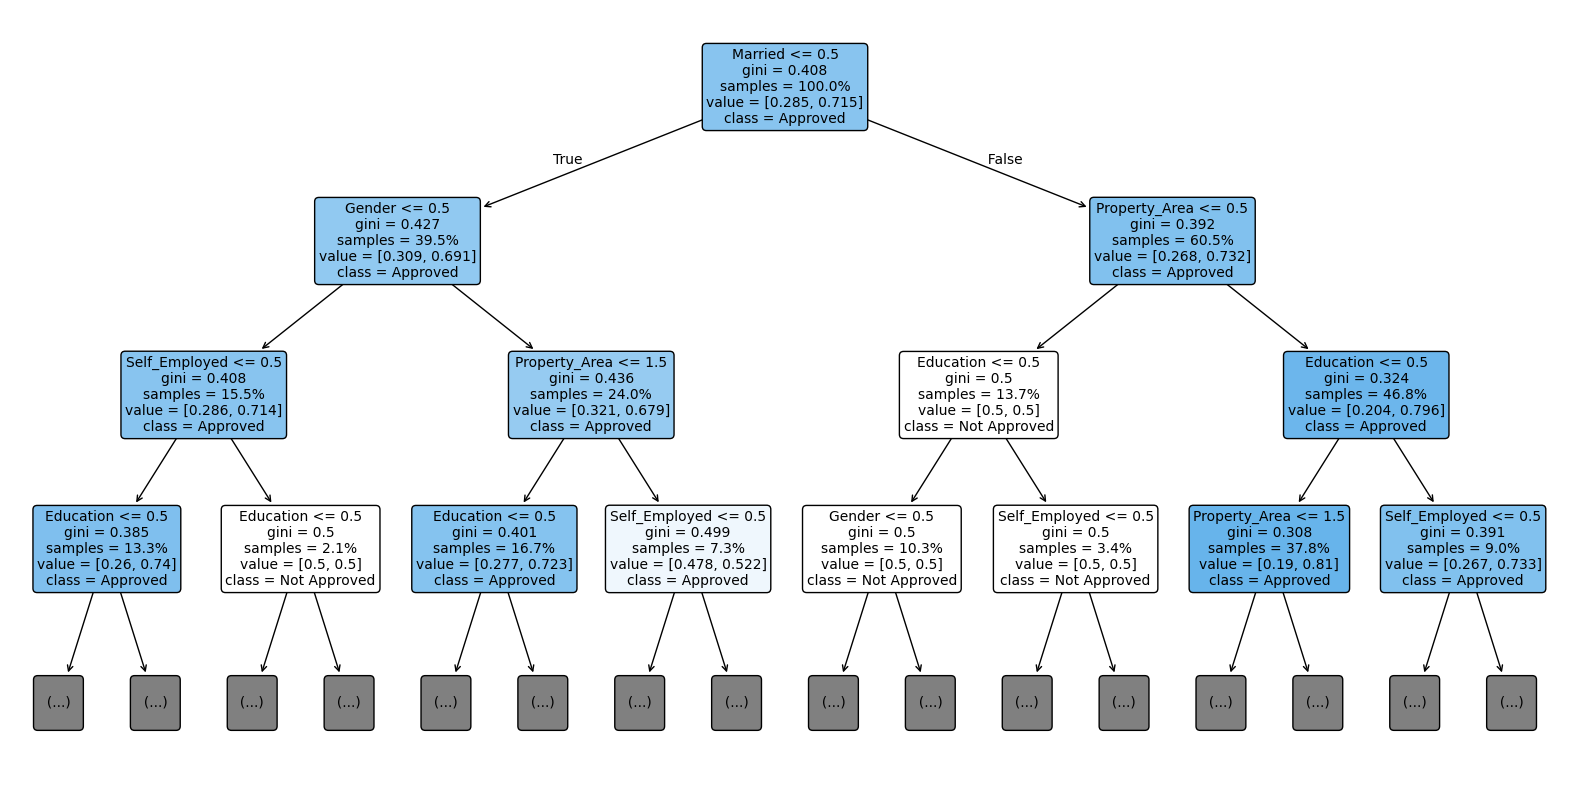

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

single_tree = rfc.estimators_[3]

plt.figure(figsize=(20,10))
tree.plot_tree(single_tree,feature_names=x.columns,class_names=['Not Approved', 'Approved'],filled=True,rounded=True,fontsize=10, max_depth=3,proportion=True)
plt.show()


# **lifetime value of the customers**

In [ ]:
import pandas as pd
import numpy as np


np.random.seed(42)


n_customers = 1000


df= {
    'Customer_ID': range(1, n_customers + 1),
    'Age': np.random.randint(18, 70, size=n_customers),
    'Gender': np.random.choice(['Male', 'Female'], size=n_customers),
    'Location': np.random.choice(['Urban', 'Suburban', 'Rural'], size=n_customers),
    'Annual_Income': np.random.randint(20000, 120000, size=n_customers),
    'Total_Spend': np.random.uniform(100, 10000, size=n_customers).round(2),
    'Transactions_Count': np.random.randint(1, 50, size=n_customers),
    'Years_as_Customer': np.random.randint(1, 10, size=n_customers),
    'Customer_Satisfaction': np.random.choice([1, 2, 3, 4, 5], size=n_customers),  # Scale of 1 to 5
    'Referral_Count': np.random.randint(0, 10, size=n_customers),
    'Discount_Used': np.random.randint(0, 20, size=n_customers),  # Number of times discounts used
}


df = pd.DataFrame(df)

# Calculate Lifetime Value as a synthetic target variable based on income, spend, transactions, and years as customer
df['Lifetime_Value'] = (df['Annual_Income'] * 0.01 +
                                   df['Total_Spend'] * 0.5 +
                                   df['Transactions_Count'] * 50 +
                                   df['Years_as_Customer'] * 100 +
                                   df['Customer_Satisfaction'] * 20 +
                                   df['Referral_Count'] * 15 -
                                   df['Discount_Used'] * 10).round(2)

# Save dataset to a CSV file for further use

df.to_csv("customer.csv")



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = customer_data.drop(['Customer_ID', 'Lifetime_Value'], axis=1)
y = customer_data['Lifetime_Value']




In [ ]:
X = pd.get_dummies(X, drop_first=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)


In [ ]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


RMSE: 261.7401017145608
R-squared: 0.974449211623914


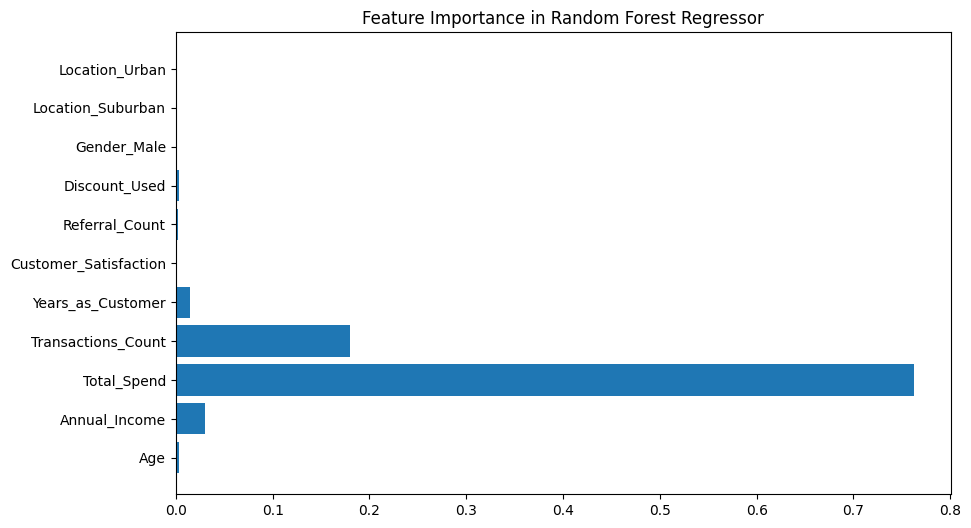

In [ ]:
importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Feature Importance in Random Forest Regressor")
plt.show()